In [1]:
import re
import os

import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('.\credit_score_train.csv')

C:\Users\olaja\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

Some colums should be a type 'category' and some 'float64'

In [5]:
df[['Month', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']] = df[['Month', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   ID                        100000 non-null  object  
 1   Customer_ID               100000 non-null  object  
 2   Month                     100000 non-null  category
 3   Name                      90015 non-null   object  
 4   Age                       100000 non-null  object  
 5   SSN                       100000 non-null  object  
 6   Occupation                100000 non-null  category
 7   Annual_Income             100000 non-null  object  
 8   Monthly_Inhand_Salary     84998 non-null   float64 
 9   Num_Bank_Accounts         100000 non-null  int64   
 10  Num_Credit_Card           100000 non-null  int64   
 11  Interest_Rate             100000 non-null  int64   
 12  Num_of_Loan               100000 non-null  object  
 13  Type_of_Loan              8859

In [6]:
print(df)

            ID Customer_ID     Month           Name   Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265   
...        ...         ...       ...            ...   ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks    25  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks    25  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks    25  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks    25  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks    25  078-73-5990   

      Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0      Scientist      19114.12

In [7]:
df['Age'] = df['Age'].str.replace(r'\D', '').astype(float)
df['Annual_Income'] = df['Annual_Income'].str.replace(r'\D', '').astype(float)
df['Num_of_Loan'] = df['Num_of_Loan'].str.replace(r'\D', '').astype(float)
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].str.replace(r'\D', '').astype(float)
df['Outstanding_Debt'] = df['Outstanding_Debt'].str.replace(r'\D', '').astype(float)
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].str.replace(r'\D', '').astype(float)
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].str.replace(r'\D', '').astype(float)
df['Monthly_Balance'] = df['Monthly_Balance'].str.replace(r'\D', '').astype(float)

<ipython-input-7-fbc8cfe3fd17>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Age'] = df['Age'].str.replace(r'\D', '').astype(float)
<ipython-input-7-fbc8cfe3fd17>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Annual_Income'] = df['Annual_Income'].str.replace(r'\D', '').astype(float)
<ipython-input-7-fbc8cfe3fd17>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Num_of_Loan'] = df['Num_of_Loan'].str.replace(r'\D', '').astype(float)
<ipython-input-7-fbc8cfe3fd17>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].str.replace(r'\D', '').astype(float)
<ipython-input-7-fbc8cfe3fd17>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Outstanding_Debt'] = df['Outstanding

ValueError: could not convert string to float: ''

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   ID                        100000 non-null  object  
 1   Customer_ID               100000 non-null  object  
 2   Month                     100000 non-null  category
 3   Name                      90015 non-null   object  
 4   Age                       100000 non-null  float64 
 5   SSN                       100000 non-null  object  
 6   Occupation                100000 non-null  category
 7   Annual_Income             100000 non-null  float64 
 8   Monthly_Inhand_Salary     84998 non-null   float64 
 9   Num_Bank_Accounts         100000 non-null  int64   
 10  Num_Credit_Card           100000 non-null  int64   
 11  Interest_Rate             100000 non-null  int64   
 12  Num_of_Loan               100000 non-null  float64 
 13  Type_of_Loan              8859

In [9]:
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821-00-0265,Scientist,1911412.0,1824.843333,3,...,_,80998.0,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821-00-0265,Scientist,1911412.0,NaN,3,...,Good,80998.0,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,500.0,821-00-0265,Scientist,1911412.0,NaN,3,...,Good,80998.0,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821-00-0265,Scientist,1911412.0,NaN,3,...,Good,80998.0,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821-00-0265,Scientist,1911412.0,1824.843333,3,...,Good,80998.0,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25.0,078-73-5990,Mechanic,3962899.0,3359.415833,4,...,_,50238.0,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25.0,078-73-5990,Mechanic,3962899.0,3359.415833,4,...,_,50238.0,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25.0,078-73-5990,Mechanic,3962899.0,3359.415833,4,...,Good,50238.0,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25.0,078-73-5990,Mechanic,3962899.0,3359.415833,4,...,Good,50238.0,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


Now I will check null values in all columns.

In [10]:
nulls_sum = pd.DataFrame(df.isnull().any(), columns=['Nulls'])
nulls_sum['Num_of_nulls [qty]'] = pd.DataFrame(df.isnull().sum())
nulls_sum['Num_of_nulls [%]'] = round((df.isnull().mean()*100),2)
nulls_sum.sort_values(by=['Num_of_nulls [qty]'], ascending=False)

,Nulls,Num_of_nulls [qty],Num_of_nulls [%]
Monthly_Inhand_Salary,True,15002,15.00
Type_of_Loan,True,11408,11.41
Name,True,9985,9.98
Credit_History_Age,True,9030,9.03
Num_of_Delayed_Payment,True,7002,7.00
Amount_invested_monthly,True,4479,4.48
Num_Credit_Inquiries,True,1965,1.96
Monthly_Balance,True,1200,1.20
ID,False,0,0.00
Changed_Credit_Limit,False,0,0.00


Location of missing values

<AxesSubplot:>

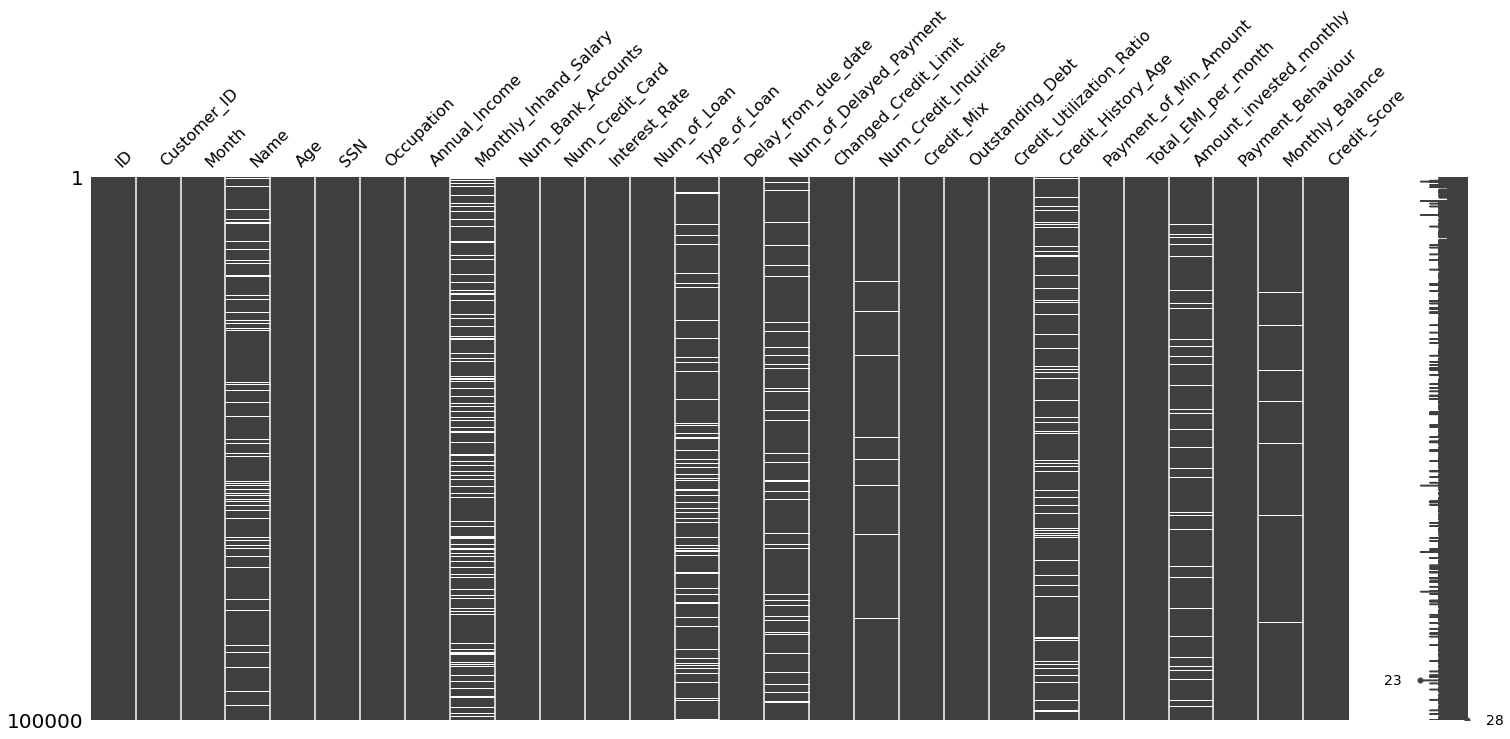

In [11]:
msno.matrix(df)

Missing data are not accumulated in one place, but scattered.

In [13]:
df.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month
count,100000.000000,1.000000e+05,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,92998.000000,98035.000000,100000.000000,100000.000000,100000.000000
mean,119.509700,1.601957e+14,4194.170850,17.091280,22.47443,72.466040,10.761960,21.068780,30.946268,27.754251,129224.119920,32.285173,1403.118217
std,684.757313,1.151113e+15,3183.686167,117.404834,129.05741,466.422621,61.789933,14.860104,226.028754,193.177339,115699.184705,5.116875,8306.041270
min,14.000000,7.046500e+04,303.645417,-1.000000,0.00000,1.000000,0.000000,-5.000000,0.000000,0.000000,12.000000,20.000000,0.000000
25%,25.000000,1.826411e+06,1625.568229,3.000000,4.00000,8.000000,2.000000,10.000000,9.000000,3.000000,40132.500000,28.052567,30.306660
50%,34.000000,3.836154e+06,3093.745000,6.000000,5.00000,13.000000,3.000000,18.000000,14.000000,6.000000,103089.000000,32.305784,69.249473
75%,42.000000,8.312624e+06,5957.448333,7.000000,7.00000,20.000000,6.000000,28.000000,18.000000,9.000000,174641.750000,36.496663,161.224249
max,8698.000000,1.349284e+16,15204.633333,1798.000000,1499.00000,5797.000000,1496.000000,67.000000,4397.000000,2597.000000,499807.000000,50.000000,82331.000000
